In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**Ngữ cảnh và Động lực:**
Nhóm đã chọn khám phá tập dữ liệu về thói quen chi tiêu của sinh viên để có cái nhìn rõ ràng về hành vi tài chính của sinh viên đại học. Là những sinh viên, nhóm hiểu sự quan trọng trong việc quản lý tài chính khi đang học đại học. Tập dữ liệu này cung cấp dữ liệu để khám phá các mô hình chi tiêu, chiến lược quản lý tài chính của các sinh viên.

**Chủ đề và Nguồn của Tập Dữ liệu:**
Tập dữ liệu tập trung vào thói quen chi tiêu của 1000 sinh viên từ các chuyên ngành khác nhau. Tập bao gồm một loạt các thuộc tính bao gồm tuổi, giới tính, năm học, chuyên ngành, thu nhập, hỗ trợ tài chính và các khoản chi tiết trong các danh mục khác nhau như học phí, nhà ở, thức ăn, giao thông vận tải và nhiều hơn nữa. Dữ liệu kết hợp giữa việc thu thập từ thực tế và auto-generate thêm để đủ cho việc phân tích và xây dựng mô hình.

**Giấy phép:**
Vì tập dữ liệu này được tạo ra cho mục đích giáo dục và nghiên cứu, nó có thể được sử dụng chủ yếu cho phân tích và nghiên cứu mà không có các hạn chế cụ thể về việc sử dụng.

**Phương pháp Thu thập Dữ liệu:**
Dữ liệu được thu thập qua các khảo sát và được tạo thêm nhằm đủ cho việc phân tích và nghiên cứu.

**Dữ liệu được tạo ra vào 5/3/2024**

In [2]:
data_df= pd.read_csv('../data/student_spending (1).csv',index_col=False)
data_df.sample(n=5)

,Unnamed: 0,age,gender,year_in_school,major,monthly_income,financial_aid,tuition,housing,food,transportation,books_supplies,entertainment,personal_care,technology,health_wellness,miscellaneous,preferred_payment_method
456,456,23,Non-binary,Freshman,Psychology,1437,777,5522,852,375,99,55,150,21,195,53,68,Credit/Debit Card
716,716,24,Non-binary,Freshman,Computer Science,1022,626,4797,413,139,167,165,75,57,219,126,43,Mobile Payment App
273,273,21,Non-binary,Senior,Biology,618,916,4952,459,192,145,202,86,81,122,150,113,Cash
834,834,18,Female,Freshman,Economics,1359,468,3900,401,283,190,183,60,78,153,64,195,Credit/Debit Card
574,574,18,Male,Sophomore,Psychology,772,72,5891,765,359,133,51,23,61,250,128,171,Mobile Payment App


In [3]:
n_rows=data_df.shape[0]
n_cols=data_df.shape[1]
n_rows, n_cols

(1000, 18)

**Ý nghĩa các hàng**:  
- Mỗi hàng thể hiện thói quen chi tiêu của mỗi sinh viên thuộc các nhóm nhân khẩu học và trình độ học vấn khác nhau.
- Tập dữ liệu không có vấn đề về các hàng có ý nghĩa khác nhau

**Ý nghĩa các cột:**
1. `Age`: Tuổi của học sinh (tính theo năm)
2. `Gender`: Giới tính của học sinh (Nam, Nữ, Không nhị phân)
3. `Year in School`: Năm học (Freshman, Sophomore, Junior, Senior)
4. `Major`: Ngành học hoặc chuyên ngành
5. `Monthly Income`: Thu nhập hàng tháng của sinh viên (tính bằng đô la)
6. `Financial Aid`: Hỗ trợ tài chính mà sinh viên nhận được (bằng đô la)
7. `Tuition`: Chi phí học phí (bằng đô la)
8. `Housing`: Chi phí nhà ở (bằng đô la)
9. `Food`: Chi phí ăn uống (tính bằng đô la)
10. `Transportation`: Chi phí vận chuyển (bằng đô la)
11. `Books & Supplies`: Chi phí mua sách và đồ dùng (bằng đô la)
12. `Entertainment`: Chi phí giải trí (tính bằng đô la)
13. `Personal Care`: Chi phí cho các hạng mục chăm sóc cá nhân (bằng đô la)
14. `Technology`: Chi phí cho công nghệ (tính bằng đô la)
15. `Health & Wellness`: Chi phí cho sức khỏe và thể chất (bằng đô la)
16. `Miscellaneous`: Các chi phí khác (bằng đô la)
17. `Preferred Payment Method`: Phương thức thanh toán ưu tiên (Tiền mặt, Thẻ tín dụng/ghi nợ, Ứng dụng thanh toán di động)

In [4]:
duplicated_rows = data_df[data_df.duplicated()]
len(duplicated_rows)

0

In [5]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Unnamed: 0                1000 non-null   int64 
 1   age                       1000 non-null   int64 
 2   gender                    1000 non-null   object
 3   year_in_school            1000 non-null   object
 4   major                     1000 non-null   object
 5   monthly_income            1000 non-null   int64 
 6   financial_aid             1000 non-null   int64 
 7   tuition                   1000 non-null   int64 
 8   housing                   1000 non-null   int64 
 9   food                      1000 non-null   int64 
 10  transportation            1000 non-null   int64 
 11  books_supplies            1000 non-null   int64 
 12  entertainment             1000 non-null   int64 
 13  personal_care             1000 non-null   int64 
 14  technology               

> Qua quan sát ta không thấy cột nào có giá trị bất thường cần xử lý

In [6]:
missing_values = data_df.isnull().sum()

# Calculate missing ratio for each column
missing_ratio = (missing_values / len(data_df)) * 100
missing_ratio

Unnamed: 0                  0.0
age                         0.0
gender                      0.0
year_in_school              0.0
major                       0.0
monthly_income              0.0
financial_aid               0.0
tuition                     0.0
housing                     0.0
food                        0.0
transportation              0.0
books_supplies              0.0
entertainment               0.0
personal_care               0.0
technology                  0.0
health_wellness             0.0
miscellaneous               0.0
preferred_payment_method    0.0
dtype: float64

> Qua tính toán ta thấy không có cột nào có giá trị bị thiếu.

Qua quan sát ta thấy được cột `unnamed` là cột lưu địa chỉ của hàng, vì vậy không cần thiết phải để lại trong tập dữ liệu, ta có thể bỏ nó.

In [7]:
columns_to_drop = ['Unnamed: 0']
data_df=data_df.drop(columns_to_drop,axis=1)


In [8]:
for column in data_df.columns:
    if data_df[column].nunique() == 1:
        print("Are all values in '{}' the same".format(column))
        data_df=data_df.drop(column,axis=1)

In [9]:
new_column_names = {
    'age': 'Age',
    'gender': 'Gender',
    'year_in_school': 'Year In School',
    'major': 'Major',
    'monthly_income': 'Monthly Income',
    'financial_aid': 'Financial Aid',
    'tuition': 'Tuition',
    'housing': 'Housing',
    'food': 'Food',
    'transportation': 'Transportation',
    'books_supplies': 'Books & Supplies',
    'entertainment': 'Entertainment',
    'personal_care': 'Personal Care',
    'technology': 'Technology',
    'health_wellness': 'Health & Wellness',
    'miscellaneous': 'Miscellaneous',
    'preferred_payment_method': 'Preferred Payment Method'
}
data_df.rename(columns=new_column_names, inplace=True)

In [10]:
data_df.sample(n=5)

,Age,Gender,Year In School,Major,Monthly Income,Financial Aid,Tuition,Housing,Food,Transportation,Books & Supplies,Entertainment,Personal Care,Technology,Health & Wellness,Miscellaneous,Preferred Payment Method
879,25,Male,Sophomore,Engineering,862,674,5473,575,338,54,264,39,60,262,180,196,Cash
247,20,Non-binary,Freshman,Computer Science,1120,327,5509,670,120,130,178,52,71,267,38,63,Mobile Payment App
865,24,Non-binary,Freshman,Engineering,1084,582,3305,520,353,89,279,20,68,173,151,128,Mobile Payment App
990,20,Non-binary,Senior,Psychology,1412,155,5576,443,305,119,136,120,41,290,30,91,Mobile Payment App
497,22,Female,Freshman,Computer Science,673,972,5357,828,279,95,298,97,21,154,34,162,Mobile Payment App


## CATEGORICAL COLUMNS

In [11]:
columns_to_count=['Gender','Year In School','Major','Preferred Payment Method']
df=data_df[columns_to_count]
cate_profile={}
def valuecount(col):
    # Count the occurrences of each attribute in the column
    unique_attributes = df[col.name].value_counts().to_dict()
    cate_profile[col.name]= {"num_diff_vals": len(unique_attributes), "distribution": unique_attributes}
df.agg(valuecount)
cate_profile=pd.DataFrame(data=cate_profile,index=["num_diff_vals", "distribution"])

cate_profile

,Gender,Year In School,Major,Preferred Payment Method
num_diff_vals,3,4,5,3
distribution,"{'Male': 356, 'Female': 323, 'Non-binary': 321}","{'Senior': 254, 'Freshman': 253, 'Junior': 247...","{'Biology': 228, 'Economics': 204, 'Computer S...","{'Mobile Payment App': 350, 'Credit/Debit Card..."


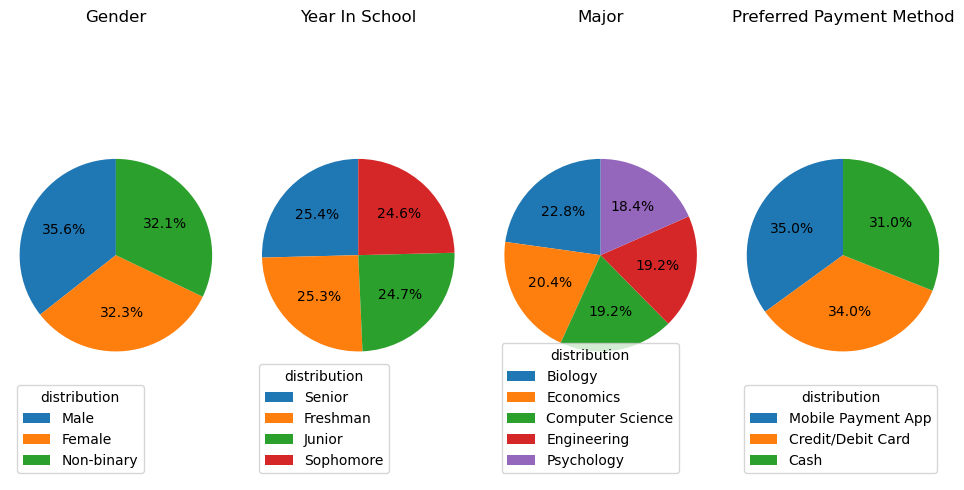

In [12]:
fig, axes = plt.subplots(1,4, figsize=(10, 5))

# Flatten the axes to iterate over them
axes = axes.flatten()

# Plot pie charts for each column
for i, col in enumerate(cate_profile.columns):
    distribution = cate_profile[col]['distribution']
    labels = distribution.keys()
    sizes = distribution.values()

    axes[i].pie(sizes,autopct='%1.1f%%', startangle=90)
    axes[i].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
    axes[i].set_title(col)
    axes[i].legend(distribution,title ="distribution",loc ="lower left")
plt.tight_layout()
plt.show()

In [13]:
data_df.describe(include='object')[1:]

,Gender,Year In School,Major,Preferred Payment Method
unique,3,4,5,3
top,Male,Senior,Biology,Mobile Payment App
freq,356,254,228,350


> Thông qua việc sử dụng describe() và trực quan hóa dữ liệu thành biểu đồ tròn ta nhận ra cách phân bố các giá trị phân loại (categorical), các giá trị hầu như đều nhau, không có giá trị nào quá nhiều hay quá ít trong tập dữ liệu

## Numerical columns

In [14]:
numeric_col_profile = data_df.describe()[1:].round(1)
numeric_col_profile

,Age,Monthly Income,Financial Aid,Tuition,Housing,Food,Transportation,Books & Supplies,Entertainment,Personal Care,Technology,Health & Wellness,Miscellaneous
mean,21.7,1020.6,504.8,4520.4,696.0,252.6,124.6,174.8,84.8,60.7,178.3,114.3,108.9
std,2.3,293.8,287.1,860.7,171.2,86.9,43.6,72.4,38.0,22.9,71.7,49.6,52.4
min,18.0,501.0,0.0,3003.0,401.0,100.0,50.0,50.0,20.0,20.0,50.0,30.0,20.0
25%,20.0,770.8,261.0,3779.8,538.8,175.0,88.0,112.0,54.0,41.0,114.0,73.0,63.8
50%,22.0,1021.0,513.0,4547.5,704.5,255.0,123.0,175.0,86.0,62.0,178.0,115.0,110.0
75%,24.0,1288.2,751.5,5285.0,837.2,330.0,162.2,238.0,116.0,80.0,241.0,158.0,153.0
max,25.0,1500.0,1000.0,6000.0,1000.0,400.0,200.0,300.0,150.0,100.0,300.0,200.0,200.0


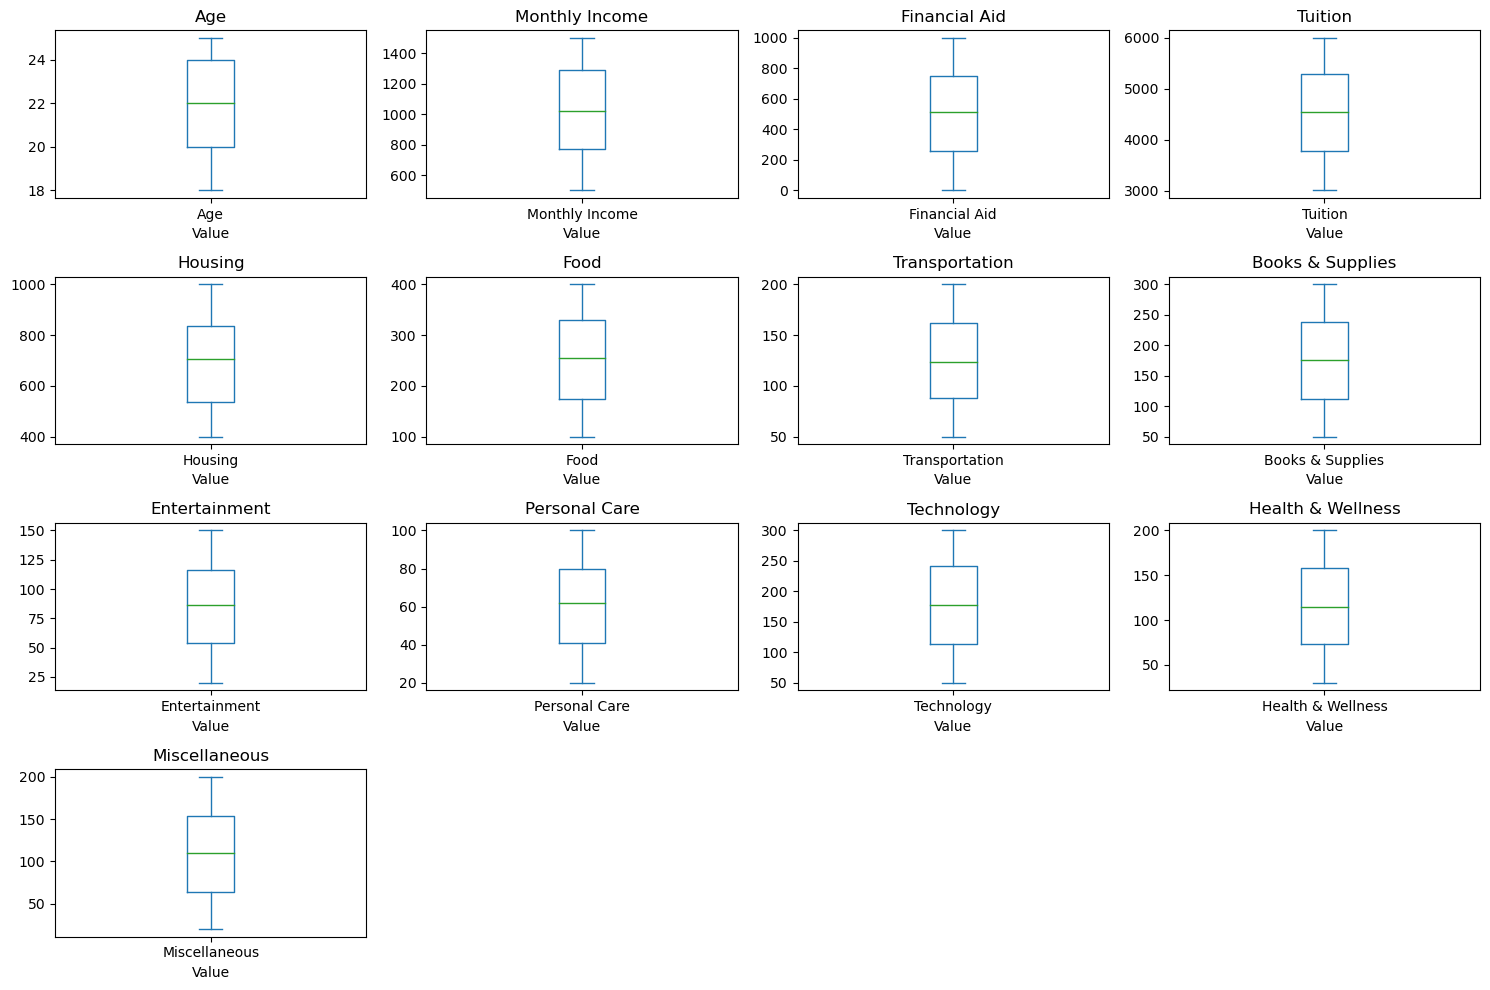

In [15]:
plt.figure(figsize=(15, 10))
for column in numeric_col_profile.columns:
    plt.subplot(4, 4, list(numeric_col_profile.columns).index(column) + 1)
    data_df[column].plot(kind='box', vert=True)
    plt.title(column)
    plt.xlabel('Value')
plt.tight_layout()
plt.show()

> Thông qua việc trực quan hóa sử dụng biểu đồ boxplot, ta thấy sự phân bố của giá trị phân vị 25, 50, 75, min, max của các cột số., qua đó cho thấy không có outlier hay giá trị bất thường nào xuất hiện ở các cột số

In [16]:
data_df.to_csv('./../data/Processed.csv',index=False)